In [1]:
%load_ext autoreload
%autoreload 2

!pip install scikit-learn

In [2]:
import data_loader as dl

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

import pandas as pd

### Load data with normalized features

In [3]:
train_df, test_df = dl.load_train_test()

/home/ec2-user/anaconda3/envs/Braket/lib/python3.7/site-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [4]:
train_df.describe()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT
count,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03
mean,-3.520077e-16,1.025718e-15,3.275304e-16,-1.680779e-15,2.328846e-15,3.345239e-16,-4.977063e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.970443e+00,-2.682273e+00,-2.504933e+00,-4.720771e+00,-5.302749e+00,-2.958814e+00,-2.113845e+00
25%,-7.472400e-01,-7.893984e-01,-8.352003e-01,-6.229221e-01,-6.958400e-01,-7.451921e-01,-8.228968e-01
50%,-1.422534e-01,-1.503122e-01,-1.668283e-01,1.607051e-02,1.197333e-01,-1.379402e-01,-2.134695e-01
75%,7.546662e-01,8.335817e-01,8.604029e-01,6.693720e-01,7.507034e-01,7.609562e-01,8.386289e-01
max,3.604266e+00,2.633681e+00,2.837185e+00,3.731128e+00,2.803496e+00,3.455390e+00,2.591755e+00


In [5]:
test_df.describe()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,-0.048045,-0.056039,-0.050511,-0.030327,-0.035373,-0.051165,0.052100
std,1.011929,0.996393,1.001906,1.043106,1.027496,1.009194,1.006183
min,-2.304408,-2.382484,-2.217429,-3.780929,-3.663882,-2.281647,-2.122434
25%,-0.785431,-0.839485,-0.859235,-0.658724,-0.749529,-0.786352,-0.764193
50%,-0.191729,-0.224543,-0.227976,0.005407,0.019003,-0.208702,-0.170675
75%,0.627361,0.733704,0.723005,0.665270,0.766864,0.609425,0.898673
max,3.257072,2.511470,2.870178,3.492112,2.945905,3.243951,2.314477


### Apply PCA with 2 components to visualize dataset

In [6]:
pca = PCA(n_components=2)
coordinates = pca.fit_transform(train_df.iloc[:,:-1])
binary_labels_train = 1 * (train_df.CLASS.values == "Cammeo")

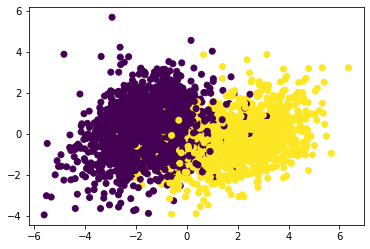

In [7]:
plt.scatter(
    x=coordinates[:,0],
    y=coordinates[:,1],
    c=binary_labels_train
)
plt.show()

### Do PCA with maximum number of components

In [8]:
pca_full = PCA(n_components=7)
train_coordinates = pca_full.fit_transform(train_df.iloc[:,:-1])
test_coordinates = pca_full.transform(test_df.iloc[:,:-1])
binary_labels_train = 1 * (train_df.CLASS.values == "Cammeo")
binary_labels_test = 1 * (test_df.CLASS.values == "Cammeo")
train_coordinates.shape

(3048, 7)

In [9]:
pca_train_df = pd.DataFrame(train_coordinates, columns=[f"pca_{j}" for j in range(1, 8)])
pca_train_df["label"] = binary_labels_train
pca_test_df = pd.DataFrame(test_coordinates, columns=[f"pca_{j}" for j in range(1, 8)])
pca_test_df["label"] = binary_labels_test
pca_train_df.describe()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,label
count,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3048.000000
mean,2.098059e-17,-3.263648e-17,-2.855692e-17,-3.445771e-17,8.159119e-18,-5.252433e-17,2.679032e-17,0.433071
std,2.143233e+00,1.219059e+00,9.488569e-01,1.076165e-01,7.798239e-02,4.486002e-02,2.099580e-02,0.495582
min,-5.607363e+00,-3.958450e+00,-1.788524e+00,-4.537180e-01,-2.915018e-01,-1.309361e-01,-1.150128e-01,0.000000
25%,-1.682084e+00,-8.273901e-01,-7.960635e-01,-6.653454e-02,-5.083171e-02,-3.035178e-02,-1.246608e-02,0.000000
50%,-3.380291e-01,-3.144862e-02,-2.555510e-01,-9.457816e-03,-3.884116e-03,-4.662520e-03,1.008088e-03,0.000000
75%,1.768977e+00,8.031806e-01,7.036092e-01,5.833980e-02,4.241342e-02,2.342672e-02,1.352848e-02,1.000000
max,6.359454e+00,5.680847e+00,2.853424e+00,7.754504e-01,7.085262e-01,2.263592e-01,1.507504e-01,1.000000


### Note

The PCA components don't have standard deviation = 1.

More important features explain more variance in the dataset and have higher standard deviation.

To use features as angles in quantum gates, rescale them again

In [10]:
pca_train_mean = pca_train_df.iloc[:, :-1].mean()
pca_train_std = pca_train_df.iloc[:, :-1].std()
pca_train_df.iloc[:, :-1] = (pca_train_df.iloc[:, :-1] - pca_train_mean) / pca_train_std
pca_test_df.iloc[:, :-1] = (pca_test_df.iloc[:, :-1] - pca_train_mean) / pca_train_std

In [11]:
pca_train_df.describe()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,label
count,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3.048000e+03,3048.000000,3048.000000
mean,5.827942e-18,-1.631824e-17,-2.564295e-17,-2.680853e-17,-2.913971e-18,2.331177e-17,0.000000,0.433071
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,0.495582
min,-2.616310e+00,-3.247136e+00,-1.884925e+00,-4.216063e+00,-3.738047e+00,-2.918770e+00,-5.477895,0.000000
25%,-7.848348e-01,-6.787121e-01,-8.389710e-01,-6.182558e-01,-6.518358e-01,-6.765887e-01,-0.593742,0.000000
50%,-1.577192e-01,-2.579745e-02,-2.693251e-01,-8.788442e-02,-4.980761e-02,-1.039349e-01,0.048014,0.000000
75%,8.253778e-01,6.588529e-01,7.415335e-01,5.421082e-01,5.438846e-01,5.222183e-01,0.644342,1.000000
max,2.967224e+00,4.660026e+00,3.007223e+00,7.205681e+00,9.085721e+00,5.045901e+00,7.180029,1.000000


In [12]:
pca_test_df.describe()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,label
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,-0.053902,0.022658,0.039105,-0.004821,0.050050,-0.025875,0.043075,0.406824
std,1.001916,1.050647,1.011639,1.049971,1.067827,1.063590,0.956928,0.491564
min,-2.322009,-4.008901,-1.561013,-3.358542,-5.332126,-3.608300,-4.383192,0.000000
25%,-0.826971,-0.619092,-0.821583,-0.695083,-0.591142,-0.697039,-0.549796,0.000000
50%,-0.215711,0.057260,-0.201117,-0.116055,-0.051266,-0.158519,0.046540,0.000000
75%,0.704299,0.694278,0.781328,0.568922,0.661362,0.502865,0.675161,1.000000
max,2.803320,3.501976,3.196356,8.107955,5.426551,6.510711,3.655035,1.000000


In [13]:
pca_train_df.head()

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,label
0,0.020788,-0.191426,-0.989873,0.881643,-2.294440,-0.812196,-2.343570,1
1,-0.313388,0.652074,-0.750103,-1.201385,0.579527,-1.232116,-0.431643,0
2,-0.056064,1.062806,-0.751293,-0.226559,-0.283136,-0.554336,-0.199412,0
3,0.369795,-0.565381,2.048093,0.712413,-0.029857,-1.152720,0.750569,1
4,-1.216664,-1.449637,-0.715455,-1.489104,0.539069,0.021665,0.045357,0


In [14]:
pca_train_df.to_csv("data/pca_transformed_train.csv", index=False)
pca_test_df.to_csv("data/pca_transformed_test.csv", index=False)

In [15]:
pca_train_df, pca_test_df = dl.load_train_test_pca(4)
pca_train_df

,pca_1,pca_2,pca_3,pca_4,label
0,0.020788,-0.191426,-0.989873,0.881643,1
1,-0.313388,0.652074,-0.750103,-1.201385,0
2,-0.056064,1.062806,-0.751293,-0.226559,0
3,0.369795,-0.565381,2.048093,0.712413,1
4,-1.216664,-1.449637,-0.715455,-1.489104,0
...,...,...,...,...,...
3043,-1.088447,1.136388,1.118357,-0.081492,0
3044,-0.205133,1.920552,-1.285616,2.148704,0
3045,-0.184974,2.495067,-1.554217,1.526498,0
3046,0.843572,-0.649255,-0.835681,-0.860083,1


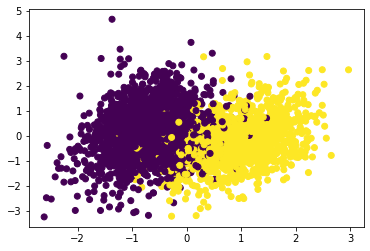

In [16]:
plt.scatter(
    x=pca_train_df["pca_1"],
    y=pca_train_df["pca_2"],
    c=pca_train_df["label"]
)
plt.show()

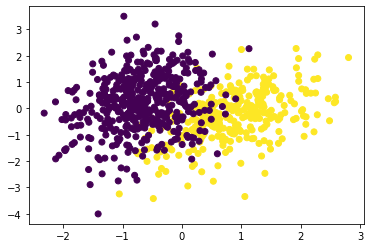

In [17]:
plt.scatter(
    x=pca_test_df["pca_1"],
    y=pca_test_df["pca_2"],
    c=pca_test_df["label"]
)
plt.show()